In [1]:
%pip install --upgrade pandas

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm

%matplotlib inline

In [3]:
ridership_data = pd.read_csv('Texas_Transit_Agency_Ridership.csv')
ridership_data.head(10)

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,1/1/02,...,9/1/22,10/1/22,11/1/22,12/1/22,1/1/23,2/1/23,3/1/23,4/1/23,5/1/23,6/1/23
0,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,DO,Bus,45502,...,33417,31293,29995,30380,32828,33364,38452,35203,38985,37660
1,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,PT,Bus,40193,...,57257,59883,55363,53883,55667,52805,62336,56664,60867,58813
2,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,TX,Bus,0,...,813,903,764,478,712,568,685,606,738,673
3,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,3146207,...,2246335,2310277,2083785,2084694,2116779,2024748,2263492,2143448,2269561,2185916
4,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",RB,DO,Bus,0,...,0,0,0,0,0,0,0,0,0,0
5,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",VP,PT,Bus,0,...,31025,29469,30222,25533,30457,28575,32384,29358,32152,32601
6,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CB,DO,Bus,0,...,0,0,0,0,0,0,0,0,0,0
7,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CB,PT,Bus,0,...,11951,11572,9702,6678,9680,9773,11585,10007,9450,9291
8,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CR,PT,Other,0,...,0,0,0,0,0,0,0,0,0,0
9,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",DR,DO,Bus,29335,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ridership_data.shape

(48, 267)

In [5]:
# Reshape
id_vars = ['Agency', 'Status', 'Reporter Type', 'UZA', 'UACE CD', 'UZA Name', 'Mode', 'TOS', '3 Mode']

df_long = ridership_data.melt(id_vars=id_vars,
                              var_name='Month_Year',
                              value_name='Ridership')

In [6]:
df_long.head(20)

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
0,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,DO,Bus,1/1/02,45502
1,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,PT,Bus,1/1/02,40193
2,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,TX,Bus,1/1/02,0
3,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,1/1/02,3146207
4,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",RB,DO,Bus,1/1/02,0
5,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",VP,PT,Bus,1/1/02,0
6,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CB,DO,Bus,1/1/02,0
7,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CB,PT,Bus,1/1/02,0
8,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CR,PT,Other,1/1/02,0
9,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",DR,DO,Bus,1/1/02,29335


In [7]:
df_long['Month_Year'] = pd.to_datetime(df_long['Month_Year'])
df_long.head()

/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_1294/2369433640.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['Month_Year'] = pd.to_datetime(df_long['Month_Year'])


,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
0,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,DO,Bus,2002-01-01,45502
1,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,PT,Bus,2002-01-01,40193
2,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,TX,Bus,2002-01-01,0
3,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-01-01,3146207
4,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",RB,DO,Bus,2002-01-01,0


In [8]:
# Filter for VIA data 
via_data = df_long[df_long['UZA Name'] == 'San Antonio, TX']
via_data.head(15)

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
0,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,DO,Bus,2002-01-01,45502
1,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,PT,Bus,2002-01-01,40193
2,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,TX,Bus,2002-01-01,0
3,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-01-01,3146207
4,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",RB,DO,Bus,2002-01-01,0
5,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",VP,PT,Bus,2002-01-01,0
48,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,DO,Bus,2002-02-01,42575
49,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,PT,Bus,2002-02-01,37784
50,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",DR,TX,Bus,2002-02-01,0
51,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-02-01,2932046


In [9]:
via_bus_data = via_data[via_data['Mode'] == 'MB']

via_bus_data.head(10)

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
3,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-01-01,3146207
51,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-02-01,2932046
99,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-03-01,3115208
147,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-04-01,3350362
195,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-05-01,3261581
243,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-06-01,2892327
291,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-07-01,2855746
339,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-08-01,3264457
387,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-09-01,3164622
435,VIA Metropolitan Transit,Active,Full Reporter: Operating,26,78580,"San Antonio, TX",MB,DO,Bus,2002-10-01,3379527


In [51]:
dallas_bus_data = dallas_bus_data[dallas_bus_data['Agency'] == 'Dallas Area Rapid Transit']

In [52]:
dallas_bus_data.tail()

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
12263,Dallas Area Rapid Transit,Active,Full Reporter: Operating,6,22042,"Dallas--Fort Worth--Arlington, TX",MB,PT,Bus,2023-04-01,0
12310,Dallas Area Rapid Transit,Active,Full Reporter: Operating,6,22042,"Dallas--Fort Worth--Arlington, TX",MB,DO,Bus,2023-05-01,2205662
12311,Dallas Area Rapid Transit,Active,Full Reporter: Operating,6,22042,"Dallas--Fort Worth--Arlington, TX",MB,PT,Bus,2023-05-01,0
12358,Dallas Area Rapid Transit,Active,Full Reporter: Operating,6,22042,"Dallas--Fort Worth--Arlington, TX",MB,DO,Bus,2023-06-01,2275675
12359,Dallas Area Rapid Transit,Active,Full Reporter: Operating,6,22042,"Dallas--Fort Worth--Arlington, TX",MB,PT,Bus,2023-06-01,0


/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_1294/963078581.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=via_bus_data, x='Month_Year', y = 'Ridership', ci=None)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

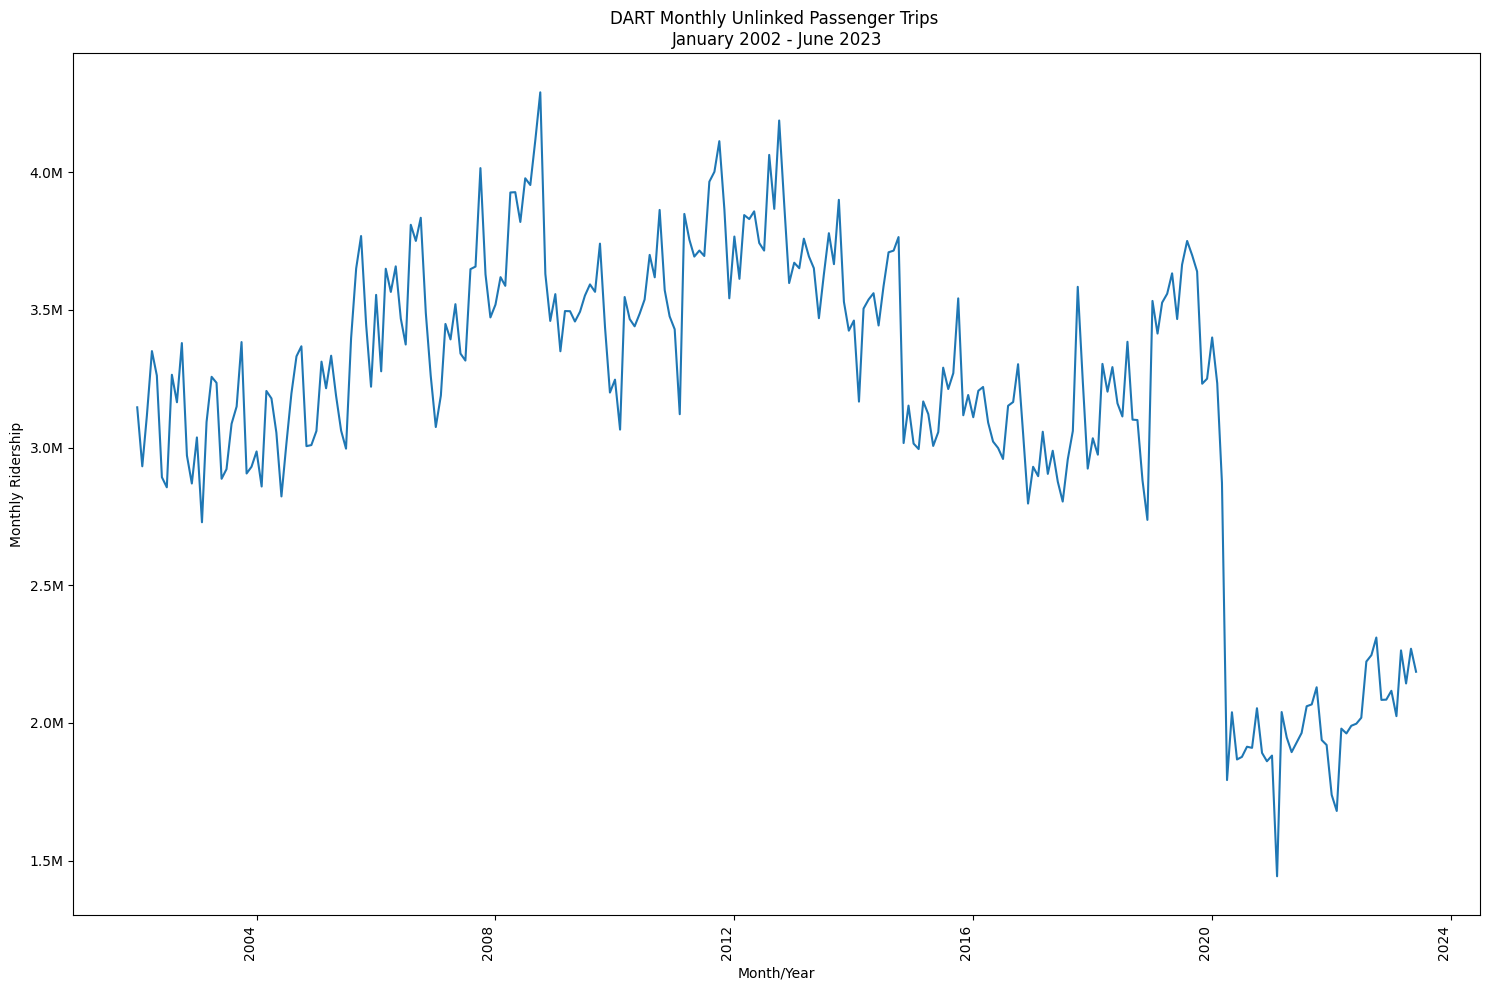

In [10]:
# Plot
plt.figure(figsize=(15,10))
sns.lineplot(data=via_bus_data, x='Month_Year', y = 'Ridership', ci=None)

def millions_format(x, pos):
    return '{:.1f}M'.format(x * 1e-6)

formatter = FuncFormatter(millions_format)
plt.gca().yaxis.set_major_formatter(formatter)

ax = plt.gca()
# ax.xaxis.set_major_locator(MonthLocator(bymonthday=1, interval=6))
# ax.xaxis.set_major_formatter(DateFormatter("%b, '%y"))
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.title('DART Monthly Unlinked Passenger Trips \nJanuary 2002 - June 2023')
plt.ylabel('Monthly Ridership')
plt.xlabel('Month/Year')
plt.tight_layout()

plt.show()


### Ridership by Individual Year

In [11]:
via_bus_data.reset_index(inplace=True)



In [38]:
atx_bus_data.head()


,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
12,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-01-01,1859173
13,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-01-01,2415737
60,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-02-01,1806712
61,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-02-01,6212032
108,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-03-01,1842902


In [39]:
atx_bus_data['Year'] = atx_bus_data['Month_Year'].dt.year


/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_1294/2562840757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atx_bus_data['Year'] = atx_bus_data['Month_Year'].dt.year


In [40]:
atx_bus_data.head()

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership,Year
12,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-01-01,1859173,2002
13,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-01-01,2415737,2002
60,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-02-01,1806712,2002
61,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-02-01,6212032,2002
108,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-03-01,1842902,2002


In [41]:
atx_bus_data = atx_bus_data.drop(columns = ['Year', 'Month'], errors = 'ignore')
atx_bus_data.head()


,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
12,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-01-01,1859173
13,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-01-01,2415737
60,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-02-01,1806712
61,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-02-01,6212032
108,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-03-01,1842902


In [42]:
# Convert the 'Month_Year' column to datetime format
atx_bus_data['Month_Year'] = pd.to_datetime(via_bus_data['Month_Year'])

# Create new 'Year' and 'Month_Name' columns
atx_bus_data['Year'] = atx_bus_data['Month_Year'].dt.year
atx_bus_data['Month_Name'] = atx_bus_data['Month_Year'].dt.strftime('%B')

atx_bus_data.head(15)

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership,Year,Month_Name
12,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2003-01-01,1859173,2003.0,January
13,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2003-02-01,2415737,2003.0,February
60,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2007-01-01,1806712,2007.0,January
61,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2007-02-01,6212032,2007.0,February
108,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2011-01-01,1842902,2011.0,January
109,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2011-02-01,2777123,2011.0,February
156,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2015-01-01,2067760,2015.0,January
157,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2015-02-01,5902688,2015.0,February
204,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2019-01-01,2088530,2019.0,January
205,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2019-02-01,739237,2019.0,February


In [43]:
# Add Month number
atx_bus_data['Month_Number'] = atx_bus_data['Month_Year'].dt.month

atx_bus_data.head()

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership,Year,Month_Name,Month_Number
12,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2003-01-01,1859173,2003.0,January,1.0
13,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2003-02-01,2415737,2003.0,February,2.0
60,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2007-01-01,1806712,2007.0,January,1.0
61,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2007-02-01,6212032,2007.0,February,2.0
108,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2011-01-01,1842902,2011.0,January,1.0


In [44]:
# Group data by year and Month
atx_grouped_data = atx_bus_data.groupby(['Year', 'Month_Name', 'Month_Number'], as_index=False)['Ridership'].sum()

# Sort the data by year and month number
atx_grouped_data.sort_values(by=['Year', 'Month_Number'], inplace=True)

atx_grouped_data.head()

,Year,Month_Name,Month_Number,Ridership
1,2003.0,January,1.0,1859173
0,2003.0,February,2.0,2415737
3,2007.0,January,1.0,1806712
2,2007.0,February,2.0,6212032
5,2011.0,January,1.0,1842902


In [45]:
atx_grouped_data = atx_grouped_data[atx_grouped_data['Year'] != 2023]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

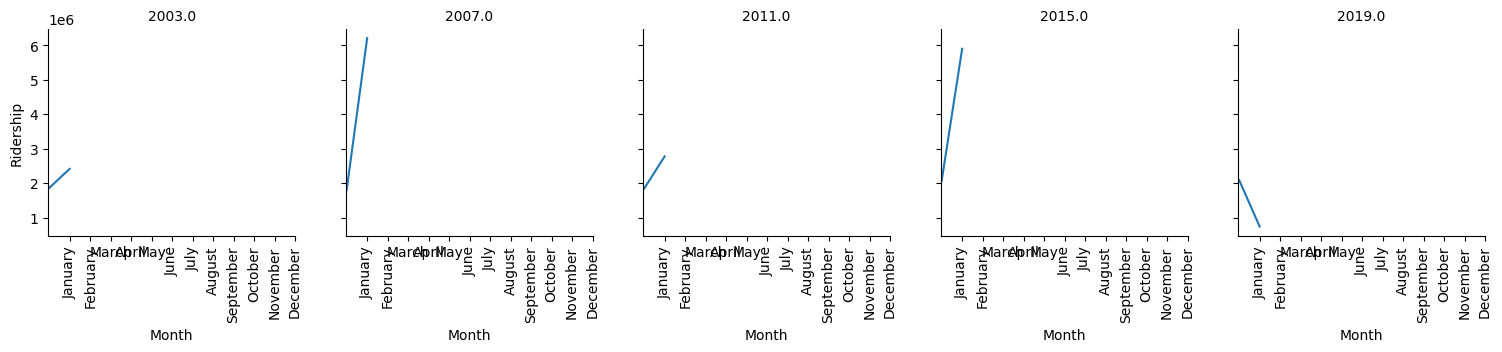

In [46]:
# Plot
# Create a FacetGrid to display graphs for each year side by side
g = sns.FacetGrid(atx_grouped_data, col="Year", col_wrap=7, height=3, sharey=True)
g.map(sns.lineplot, 'Month_Name', 'Ridership')

# Adjust the labels and titles for clarity
g.set_axis_labels('Month', 'Ridership')
g.set_titles('{col_name}')
# Adjusting the axis labels
#g.set_axis_labels('Month', 'Ridership')
g.set_xticklabels(rotation=90)
g.set(xticks=range(1, 13), xticklabels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Adjust the layout
#g.tight_layout()

# Show the plot
plt.show()

### Census Data for Per Capita / Per 100K people

In [24]:
%pip install census
%pip install us

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [22]:
from census import Census
from us import states

c = Census("424f92466b9366c84e90d2c214e6fa70b1d2fe7f")

In [51]:
# Get the population data for Bexar County, Texas for a particular year (e.g., 2019)
population_data = c.acs5.get(('NAME', 'B01003_001E'), {'for': 'county:029', 'in': 'state:48'}, year=2019)

# Print the retrieved data
print(population_data)


[{'NAME': 'Bexar County, Texas', 'B01003_001E': 1952843.0, 'state': '48', 'county': '029'}]


In [52]:
# Get 2000 and 2010 decennial census data for Bexar County, Texas
pop_2000 = c.sf1.get(('NAME', 'P001001'), geo={'for': 'county:029', 'in': 'state:48'}, year=2000)
pop_2010 = c.sf1.get(('NAME', 'P001001'), geo={'for': 'county:029', 'in': 'state:48'}, year=2010)

print("2000 Population:", pop_2000)
print("2010 Population:", pop_2010)

2000 Population: [{'NAME': 'Bexar County, Texas', 'P001001': '1392931', 'state': '48', 'county': '029'}]
2010 Population: [{'NAME': 'Bexar County, Texas', 'P001001': '1714773', 'state': '48', 'county': '029'}]


In [53]:
# Get ACS 5-year data from 2009 to 2019
for year in range(2009, 2022):
    pop_data = c.acs5.get(('NAME', 'B01003_001E'), {'for': 'county:029', 'in': 'state:48'}, year=year)
    print(f"{year} Population:", pop_data)

# For years 2020 to 2022, you might have to look for other sources or estimates as ACS 5-year data for these years might not be available yet.


2009 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1584817.0, 'state': '48', 'county': '029'}]
2010 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1650052.0, 'state': '48', 'county': '029'}]
2011 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1686452.0, 'state': '48', 'county': '029'}]
2012 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1719902.0, 'state': '48', 'county': '029'}]
2013 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1753238.0, 'state': '48', 'county': '029'}]
2014 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1789088.0, 'state': '48', 'county': '029'}]
2015 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1825502.0, 'state': '48', 'county': '029'}]
2016 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1858699.0, 'state': '48', 'county': '029'}]
2017 Population: [{'NAME': 'Bexar County, Texas', 'B01003_001E': 1892004.0, 'state': '48', 'county': '029'}]
2018 Population: [{

In [63]:
# Create a dictionary with population data
population_data = {}

# Adding the 2000 population data for the years 2002 to 2008
pop_2000_value = int(pop_2000[0]['P001001'])
for year in range(2002, 2009):
    population_data[year] = pop_2000_value

# Adding the ACS data from 2009 to 2019
for year in range(2009, 2020):
    pop_data = c.acs5.get(('NAME', 'B01003_001E'), {'for': 'county:029', 'in': 'state:48'}, year=year)
    population_data[year] = int(pop_data[0]['B01003_001E'])

# Adding the 2010 population data for the years 2020 to 2022
pop_2010_value = int(pop_2010[0]['P001001'])
for year in range(2020, 2023):
    population_data[year] = pop_2010_value

print(population_data)

{2002: 1392931, 2003: 1392931, 2004: 1392931, 2005: 1392931, 2006: 1392931, 2007: 1392931, 2008: 1392931, 2009: 1584817, 2010: 1650052, 2011: 1686452, 2012: 1719902, 2013: 1753238, 2014: 1789088, 2015: 1825502, 2016: 1858699, 2017: 1892004, 2018: 1925865, 2019: 1952843, 2020: 1714773, 2021: 1714773, 2022: 1714773}


In [62]:
via_grouped_data.head()

,Year,Month_Name,Month_Number,Ridership,Population,UPTs_per_capita,Pop_2
4,2002-01-01,January,1,3146207,NaN,3.873304,NaN
3,2002-01-01,February,2,2932046,NaN,3.609649,NaN
7,2002-01-01,March,3,3115208,NaN,3.835141,NaN
0,2002-01-01,April,4,3350362,NaN,4.124639,NaN
8,2002-01-01,May,5,3261581,NaN,4.015341,NaN


In [60]:
# Map the population data to the respective year
via_grouped_data['Pop_2'] = via_grouped_data['Year'].map(population_data)

In [61]:
via_grouped_data.head()

,Year,Month_Name,Month_Number,Ridership,Population,UPTs_per_capita,Pop_2
4,2002-01-01,January,1,3146207,NaN,3.873304,NaN
3,2002-01-01,February,2,2932046,NaN,3.609649,NaN
7,2002-01-01,March,3,3115208,NaN,3.835141,NaN
0,2002-01-01,April,4,3350362,NaN,4.124639,NaN
8,2002-01-01,May,5,3261581,NaN,4.015341,NaN


In [32]:
# UPTs per capita
via_grouped_data['UPTs_per_capita'] = via_grouped_data['Ridership'] / via_grouped_data['Population']
via_grouped_data.head()


,Year,Month_Name,Month_Number,Ridership,Population,UPTs_per_capita
4,2002,January,1,3146207,812280,3.873304
3,2002,February,2,2932046,812280,3.609649
7,2002,March,3,3115208,812280,3.835141
0,2002,April,4,3350362,812280,4.124639
8,2002,May,5,3261581,812280,4.015341


In [33]:
via_grouped_data['Year'] = pd.to_datetime(via_grouped_data['Year'], format='%Y')

/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_1294/816585071.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=via_grouped_data, x='Year', y='UPTs_per_capita', ci=None)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

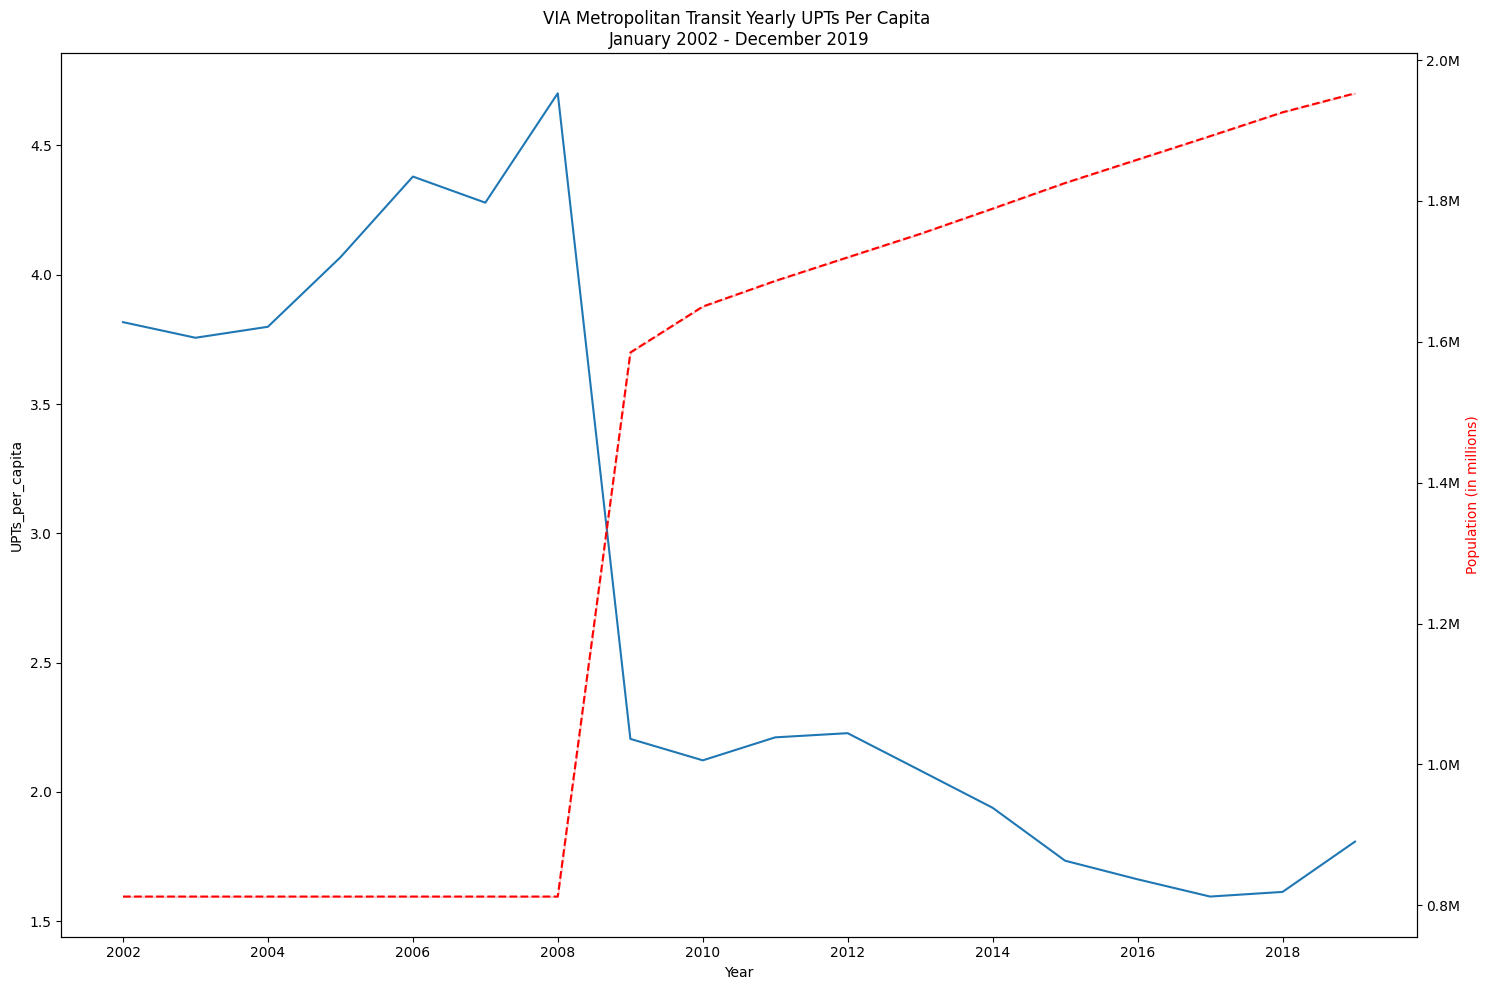

In [35]:
# Filter data to exclude 2023
via_grouped_data = via_grouped_data[via_grouped_data['Year'].dt.year < 2020]

plt.figure(figsize=(15,10))

# Create a plot for UPTs per capita
sns.lineplot(data=via_grouped_data, x='Year', y='UPTs_per_capita', ci=None)

# Create a secondary y-axis for population
ax2 = plt.gca().twinx()
sns.lineplot(data=via_grouped_data, x='Year', y='Population', ax=ax2, color='r', linestyle='--')

# Format the secondary y-axis to display values in millions
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1f}M'.format(y*1e-6)))

# Set up the x-axis
ax = plt.gca()
# ax.xaxis.set_major_locator(MonthLocator(bymonthday=1, interval=6))
# ax.xaxis.set_major_formatter(DateFormatter("%b, '%y"))
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

# Add titles and labels
plt.title('VIA Metropolitan Transit Yearly UPTs Per Capita \nJanuary 2002 - December 2019')
ax.set_ylabel('Yearly UPTs per Capita', color='b')
ax2.set_ylabel('Population (in millions)', color='r')
plt.xlabel('Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


---
## Austin, TX

In [36]:
# Filter for VIA data 
atx_data = df_long[df_long['UZA Name'] == 'Austin, TX']
atx_data.head(15)

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
6,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CB,DO,Bus,2002-01-01,0
7,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CB,PT,Bus,2002-01-01,0
8,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",CR,PT,Other,2002-01-01,0
9,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",DR,DO,Bus,2002-01-01,29335
10,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",DR,PT,Bus,2002-01-01,234
11,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",DR,TX,Bus,2002-01-01,0
12,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-01-01,1859173
13,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-01-01,2415737
14,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",VP,DO,Bus,2002-01-01,24439
15,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",VP,PT,Bus,2002-01-01,0


In [37]:
# Filter for mode MB
atx_bus_data = atx_data[atx_data['Mode'] == 'MB']

atx_bus_data.head(10)

,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Month_Year,Ridership
12,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-01-01,1859173
13,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-01-01,2415737
60,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-02-01,1806712
61,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-02-01,6212032
108,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-03-01,1842902
109,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-03-01,2777123
156,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-04-01,2067760
157,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-04-01,5902688
204,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,DO,Bus,2002-05-01,2088530
205,Capital Metropolitan Transportation Authority,Active,Full Reporter: Operating,37,4384,"Austin, TX",MB,PT,Bus,2002-05-01,739237


In [17]:
import numpy as np
atx_bus_data.replace([np.inf, -np.inf], np.nan, inplace=True)

/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_78209/409960664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atx_bus_data.replace([np.inf, -np.inf], np.nan, inplace=True)


/var/folders/h6/yxy6glj14rd2c83llgj50xnc0000gn/T/ipykernel_78209/3485896518.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=atx_bus_data, x='Month_Year', y = 'Ridership', ci=None)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

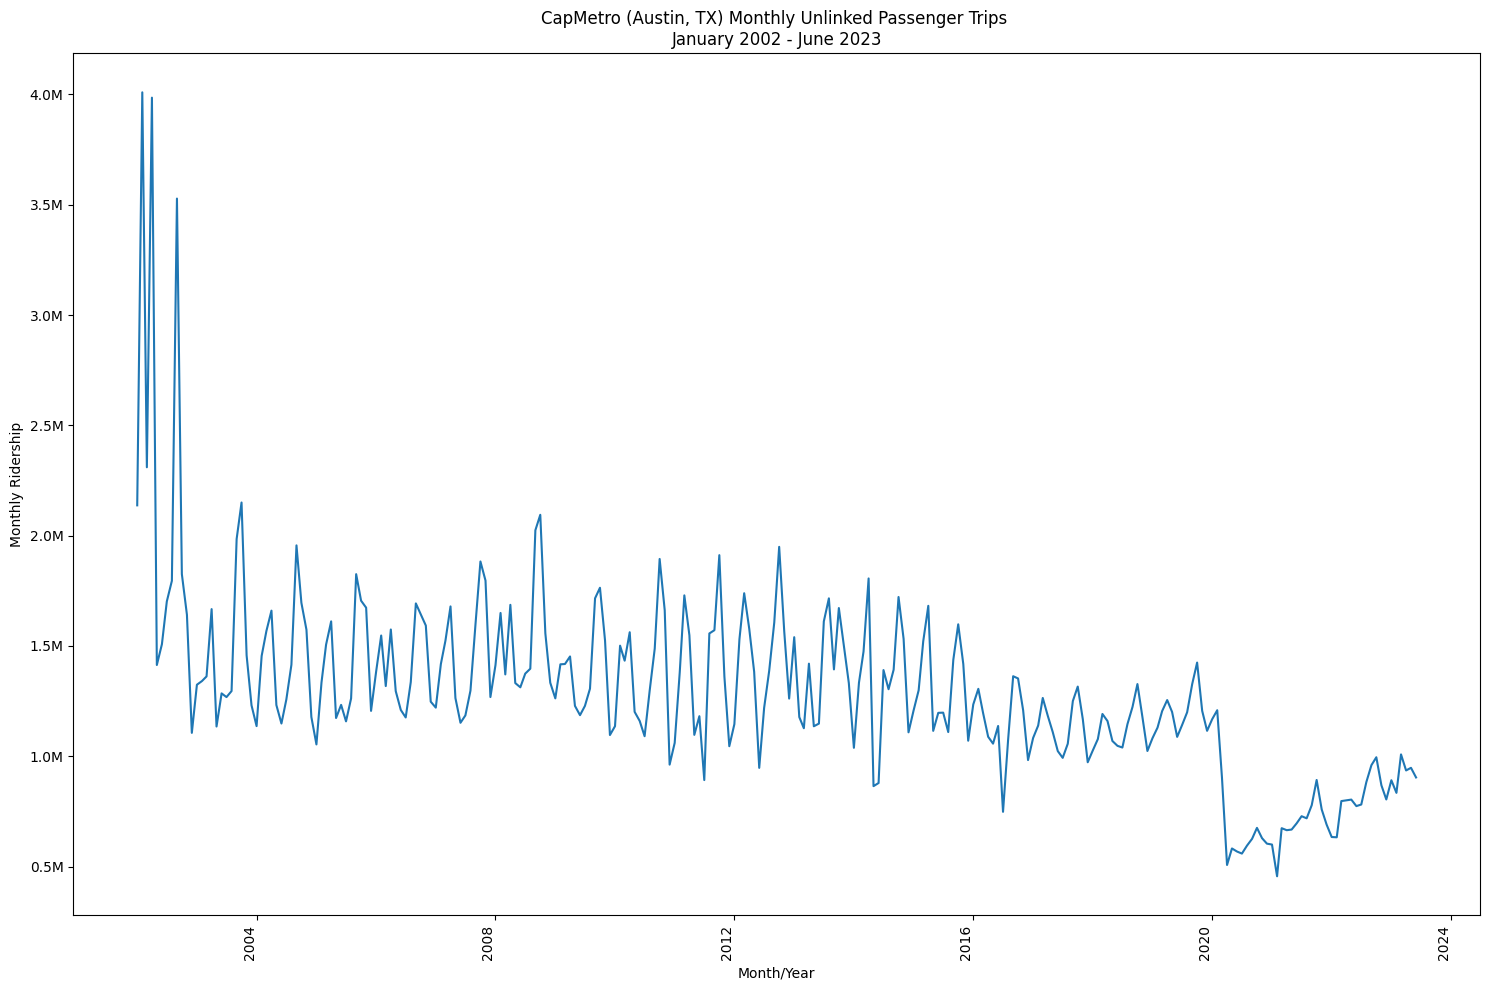

In [22]:

# Plot
plt.figure(figsize=(15,10))
sns.lineplot(data=atx_bus_data, x='Month_Year', y = 'Ridership', ci=None)

def millions_format(x, pos):
    return '{:.1f}M'.format(x * 1e-6)

formatter = FuncFormatter(millions_format)
plt.gca().yaxis.set_major_formatter(formatter)

ax = plt.gca()
# ax.xaxis.set_major_locator(MonthLocator(bymonthday=1, interval=6))
# ax.xaxis.set_major_formatter(DateFormatter("%b, '%y"))
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.title('CapMetro (Austin, TX) Monthly Unlinked Passenger Trips \nJanuary 2002 - June 2023')
plt.ylabel('Monthly Ridership')
plt.xlabel('Month/Year')
plt.tight_layout()

plt.show()